Twitter Sentiment Analysis

In [ ]:
#Importing Libaries
import pandas as pd
import numpy as np
import seaborn as sns
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
#Reading data
data=pd.read_csv('/content/drive/My Drive/intern/train.csv',encoding = 'latin - 1')
data

id  label                                              tweet
0          1      0   @user when a father is dysfunctional and is s...
1          2      0  @user @user thanks for #lyft credit i can't us...
2          3      0                                bihday your majesty
3          4      0  #model   i love u take with u all the time in ...
4          5      0             factsguide: society now    #motivation
...      ...    ...                                                ...
31957  31958      0  ate @user isz that youuu?Ã°ÂÂÂÃ°ÂÂÂÃ°ÂÂ...
31958  31959      0    to see nina turner on the airwaves trying to...
31959  31960      0  listening to sad songs on a monday morning otw...
31960  31961      1  @user #sikh #temple vandalised in in #calgary,...
31961  31962      0                   thank you @user for you follow  

[31962 rows x 3 columns]

In [ ]:
data.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

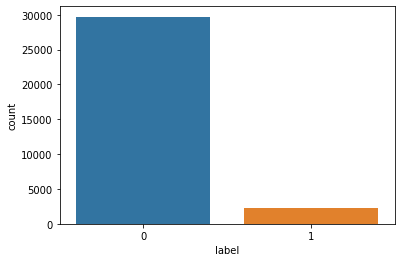

In [ ]:
sns.countplot(data.label)

## the above plot gives the information regarding the number of 1's and 0's in the column 'label'

In [ ]:
data.shape #Size of data

(31962, 3)

In [ ]:
data.isna().sum() #Null Values

id       0
label    0
tweet    0
dtype: int64

In [ ]:
data.describe() #Statistical data

id         label
count  31962.000000  31962.000000
mean   15981.500000      0.070146
std     9226.778988      0.255397
min        1.000000      0.000000
25%     7991.250000      0.000000
50%    15981.500000      0.000000
75%    23971.750000      0.000000
max    31962.000000      1.000000

Cleaning with nltk

In [ ]:
#Removing stopwords on train file
from nltk.corpus import stopwords
stop=stopwords.words("english")
stop.extend(["i'm","I'm"])
data.tweet=data.tweet.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data.head()

id  label                                              tweet
0   1      0  @user father dysfunctional selfish drags kids ...
1   2      0  @user @user thanks #lyft credit can't use caus...
2   3      0                                     bihday majesty
3   4      0  #model love u take u time urÃ°ÂÂÂ±!!! Ã°ÂÂ...
4   5      0                    factsguide: society #motivation

In [ ]:
def clean(a):
    a=' '.join(re.sub("(@[A-Za-z0-9]+)|([^A-Za-z0-9']+)|(\w+:\/\/\S+)"," ",a).split())
    return a

In [ ]:
#Removing Hyperlinks and user ID on train file
data.tweet = data.tweet.apply(clean)
data.head()

id  label                                              tweet
0   1      0  father dysfunctional selfish drags kids dysfun...
1   2      0  user thanks lyft credit can't use cause offer ...
2   3      0                                     bihday majesty
3   4      0                        model love u take u time ur
4   5      0                      factsguide society motivation

In [ ]:
#Applying Lemmatization on train file
from nltk.stem.wordnet import WordNetLemmatizer
w = WordNetLemmatizer()
data.tweet=data.tweet.apply(lambda x:' '.join([w.lemmatize(word,'v') for word in x.split()])) # v stands for verb
data.head()

id  label                                              tweet
0   1      0  father dysfunctional selfish drag kid dysfunct...
1   2      0  user thank lyft credit can't use cause offer w...
2   3      0                                     bihday majesty
3   4      0                        model love u take u time ur
4   5      0                      factsguide society motivation

In [ ]:
data.tweet=data.tweet.apply(lambda a:' '.join([word.lower() for word in a.split()]))


Applying same techniques for test data for cleaning

In [ ]:
#Reading test data
test = pd.read_csv('/content/drive/My Drive/intern/test.csv',encoding='latin- 1')
#Removing stopwords
test.tweet=test.tweet.apply(lambda a: ' '.join([word for word in a.split() if word not in (stop)]))
# Removing Hyperlinks, userIDS
test.tweet = test.tweet.apply(clean)
# Applying Lemmatization
w1 = WordNetLemmatizer()
test.tweet=test.tweet.apply(lambda a:' '.join([w1.lemmatize(word,'v') for word in a.split()])) 
test.tweet=test.tweet.apply(lambda a:' '.join([word.lower() for word in a.split()]))


Reading result data

In [ ]:
#Reading Result Data
test1 = pd.read_csv('/content/drive/My Drive/intern/result.csv')

Applying TFIDF Vectorizer for train and test data

In [ ]:
#Applying TFIDF Vectorizer to train and test data
from sklearn.feature_extraction.text import TfidfVectorizer
t = TfidfVectorizer()
new = t.fit_transform(data.tweet)
new
test_inp = t.transform(test.tweet)
test_inp

<17197x35865 sparse matrix of type '<class 'numpy.float64'>'
	with 123657 stored elements in Compressed Sparse Row format>

SMOTE

In [ ]:
#Importing Smote
from imblearn.combine import SMOTETomek
s = SMOTETomek(random_state=42)
x,y=s.fit_sample(new,data.label)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(x.shape)
print(y.shape)

(59440, 35865)
(59440,)


In [ ]:
data.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

Navie Bayes Method

In [ ]:
#Navie Bayes Method
#Importing BernNB
from sklearn.naive_bayes import MultinomialNB
m = MultinomialNB()
m.fit(x,y)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
#Prediction
m_train=m.predict(x)
m_test=m.predict(test_inp)

In [ ]:
# Classification report 
from sklearn.metrics import classification_report
print("Report on Train")
print(classification_report(y,m_train))
print('----------------------------------------------------------------')
print("Report on Test")
print(classification_report(test1.label,m_test))

Report on Train
              precision    recall  f1-score   support

           0       0.99      0.95      0.97     29720
           1       0.95      0.99      0.97     29720

    accuracy                           0.97     59440
   macro avg       0.97      0.97      0.97     59440
weighted avg       0.97      0.97      0.97     59440

----------------------------------------------------------------
Report on Test
              precision    recall  f1-score   support

           0       0.99      0.91      0.95     16282
           1       0.36      0.90      0.52       915

    accuracy                           0.91     17197
   macro avg       0.68      0.91      0.74     17197
weighted avg       0.96      0.91      0.93     17197



In [ ]:
# recall on test data
from sklearn.metrics import recall_score
recall_score(test1.label,m_test)

0.9038251366120219

In [ ]:
# Testing On New Message using multinomial NB from train data
new_message = pd.Series("retweet if you agree!")
new_message_transformed = t.transform(new_message)
m.predict(new_message_transformed)

array([1])

In [ ]:
# Testing On New Message using multinomial NB from train data
new_message = pd.Series("i get to see my daddy today!!   #80days #gettingfed")
new_message_transformed = t.transform(new_message)
m.predict(new_message_transformed)

array([0])

Logistic Regression


In [ ]:
#Importing LogisticRegression
from sklearn.linear_model import LogisticRegression
r=LogisticRegression()
r.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Prediction
l_train=r.predict(x)
l_test=r.predict(test_inp)

In [ ]:
#Classification Report
from sklearn.metrics import classification_report,recall_score
print("Report on train")
print(classification_report(y,l_train))
print('----------------------------------------------------------------')
print('----------------------------------------------------------------')
print("Report on Test")
print(classification_report(test1.label,l_test))

Report on train
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     29720
           1       0.97      0.97      0.97     29720

    accuracy                           0.97     59440
   macro avg       0.97      0.97      0.97     59440
weighted avg       0.97      0.97      0.97     59440

----------------------------------------------------------------
----------------------------------------------------------------
Report on Test
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     16282
           1       0.46      0.93      0.62       915

    accuracy                           0.94     17197
   macro avg       0.73      0.94      0.79     17197
weighted avg       0.97      0.94      0.95     17197



In [ ]:
recall_score(test1.label,l_test)

0.9333333333333333

***Conlcusion***

We have performed two methods on twiter sentiment analyish which are Navie Bayes and Logistic regression in order to find out if a tweet is giving a postive response or negative response.

Out of this both the methods Logistic regression gave better accurracy which is 0.933333333333 while Navie bayes was 0.903825136612.
Therefore we can consider logistic regression as the best method to differentiate between if a tweet is a negative or postive one

